In [1]:
from dataclasses import dataclass
from collections import defaultdict

import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import uniform, norm

from matplotlib import pyplot as plt

from common import simple_heuristics, make_mw_heuristics

In [2]:
@dataclass
class NormalDrug:
    mean : float = 0
    std : float = 1

    def sample(self, size=100):
        return rnd.normal(self.mean, self.std, size)

@dataclass
class NormalMutator:
    bias : float = -0.1
    intensity : float = 0.1
    
    def mutate(self, drug : NormalDrug):
        delta = rnd.normal(self.bias, self.intensity)
        return NormalDrug(drug.mean + delta, drug.std)

    def get_optimal_heuristics(self):
        def optimal_heuristics(test_sample, control_sample):
            diff_var = (
                test_sample.var(ddof=1) / test_sample.shape[0] +
                control_sample.var(ddof=1) / control_sample.shape[0]
            )
            effect_size = test_sample.mean() - control_sample.mean()
            return (self.bias * (1 / self.intensity ** 2) + effect_size * (1 / diff_var)) > 0
        return optimal_heuristics

def simulate_progress(accept_heuristics, mutator : NormalMutator, start_drug: NormalDrug = NormalDrug()):
    progress = [start_drug.mean]
    current_drug = start_drug
    for i in range(n_trials):
        mutated_drug = mutator.mutate(current_drug)
        if accept_heuristics(
            mutated_drug.sample(sample_size),
            current_drug.sample(sample_size)
        ):
            current_drug = mutated_drug
        progress.append(current_drug.mean)
    return progress

def calc_trajectories(n_runs):
    trajectories = {}
    for name, accept_heuristics, color in heuristics:
        trajectories[name] = [simulate_progress(accept_heuristics, mutator) for i in range(n_runs)]
    return trajectories

def plot_trajectories(trajectories):
    plt.yscale("symlog")
    for name, _, color in heuristics:
        mean_traj = np.mean(trajectories[name], axis=0)
        std_errors = np.std(trajectories[name], axis=0, ddof=1) / np.sqrt(n_runs)
        x = np.arange(n_trials + 1)

        plt.plot(mean_traj, color=color, label = name)
        plt.fill_between(x, mean_traj - std_errors, mean_traj + std_errors, color=color, alpha=0.25)
#         for run in trajectories[name]:
#             plt.plot(run, color=color, alpha=0.1)

    plt.legend()
    plt.show()

def plot_final_quality(trajectories):
    for name, _, color in heuristics:
        plt.hist([run[-1] for run in trajectories[name]], label=name, alpha=0.5, color=color)
    plt.legend()
    plt.show()

In [3]:
mutator = NormalMutator(-0.1, 0.1)
mw_cmap = plt.get_cmap("winter")
heuristics = [
    ("simple", simple_heuristics, "gray"),
    ("mw_0.1", make_mw_heuristics(0.1), mw_cmap(0.9)),
    ("mw_0.05", make_mw_heuristics(0.05), mw_cmap(0.5)),
    ("mw_0.01", make_mw_heuristics(0.01), mw_cmap(0.1)),
    ("optimal", mutator.get_optimal_heuristics(), "red")
]

n_runs = 100
sample_size = 100
n_trials = 1000
rnd = np.random.RandomState(0)

In [12]:
trajectories = calc_trajectories(n_runs)

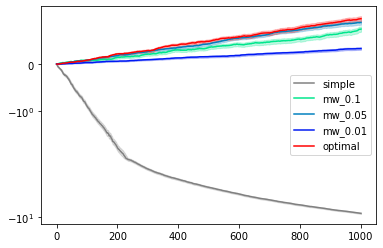

In [13]:
plot_trajectories(trajectories)

In [15]:
mutator = NormalMutator(0, 0.1)
mw_cmap = plt.get_cmap("winter")
heuristics = [
    ("simple", simple_heuristics, "gray"),
    ("mw_0.1", make_mw_heuristics(0.1), mw_cmap(0.9)),
    ("mw_0.05", make_mw_heuristics(0.05), mw_cmap(0.5)),
    ("mw_0.01", make_mw_heuristics(0.01), mw_cmap(0.1)),
    ("optimal", mutator.get_optimal_heuristics(), "red")
]

n_runs = 100
sample_size = 100
n_trials = 1000
rnd = np.random.RandomState(0)

In [16]:
trajectories = calc_trajectories(n_runs)

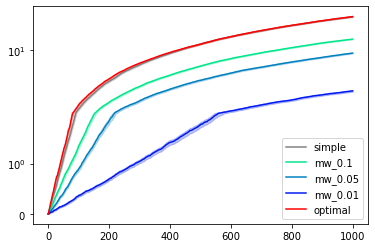

In [17]:
plot_trajectories(trajectories)

In [21]:
mutator = NormalMutator(-0.05, 0.1)
mw_cmap = plt.get_cmap("winter")
heuristics = [
    ("simple", simple_heuristics, "gray"),
    ("mw_0.1", make_mw_heuristics(0.1), mw_cmap(0.9)),
    ("mw_0.05", make_mw_heuristics(0.05), mw_cmap(0.5)),
    ("mw_0.01", make_mw_heuristics(0.01), mw_cmap(0.1)),
    ("optimal", mutator.get_optimal_heuristics(), "red")
]

n_runs = 100
sample_size = 100
n_trials = 1000
rnd = np.random.RandomState(0)

In [22]:
trajectories = calc_trajectories(n_runs)

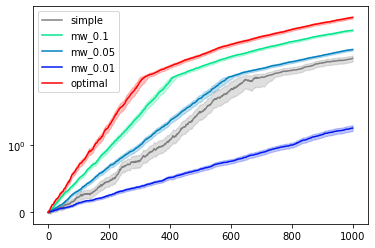

In [23]:
plot_trajectories(trajectories)